In [128]:




pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.Collecting nbformat



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import nbformat
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import os  
  

In [14]:
import glob

def extract_and_append_excel_files(folder_path):

    excel_files = glob.glob(folder_path + "/*.csv")  

    if not excel_files:
        print("No Excel files found in the specified folder.")
        return None

    combined_df = pd.DataFrame()

    for file in excel_files:
        try:
            df = pd.read_csv(file,encoding="latin-1")
            combined_df = pd.concat([combined_df, df], ignore_index=True)
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    return combined_df
folder_path = "C:\\Users\\sneha R\\OneDrive - Acacia Analytics\\Documents\\vehicle _valuation\\Data\\Raw_data\\Valuation Data\\kenya.csv"
folder_path1 = "C:\\Users\\sneha R\\OneDrive - Acacia Analytics\\Documents\\vehicle _valuation\\Data\\Raw_data\\Aution"
folder_path2= "C:\\Users\\sneha R\\OneDrive - Acacia Analytics\\Documents\\vehicle _valuation\\Data\\Raw_data\\eezy_car_valuation"
winners_folder="C:\\Users\\sneha R\\OneDrive - Acacia Analytics\\Documents\\vehicle _valuation\\Data\\Raw_data\\20241009winners.csv"

valuation=pd.read_csv(folder_path,encoding="latin-1")
winners=pd.read_csv(winners_folder,encoding="latin-1")

Aution=extract_and_append_excel_files(folder_path1)
eezy_car_valuation=extract_and_append_excel_files(folder_path2)
print(winners.shape)

C:\Users\sneha R\AppData\Local\Temp\ipykernel_18836\2593250269.py:26: DtypeWarning: Columns (5,13,37,38,54,70,71,72,73,74,75,76,77,79,80,97,98,99,100,101,102,103,104,105,106,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  valuation=pd.read_csv(folder_path,encoding="latin-1")


(3017, 49)


In [78]:
valuation_cleaned = valuation [(valuation['STATUS']=='complete' )| (valuation['STATUS']=='Completed') ].dropna(axis=1, how='all')
winners_cleaned = winners.dropna(axis=1, how='all')
Aution_cleaned = Aution.dropna(axis=1, how='all')
eezy_car_valuation_cleaned = eezy_car_valuation.dropna(axis=1, how='all')
valuation_cleaned.rename(columns={'REGISTRATION': 'RegNo'}, inplace=True)
valuation_cleaned.rename(columns={'ODOMETER': 'Mileage'}, inplace=True)
valuation_cleaned.rename(columns={'YEAR_MAN': 'Year'}, inplace=True)
valuation_cleaned.rename(columns={'ENGINE_MODEL': 'Vehicle Type'}, inplace=True)
valuation_cleaned.rename(columns={'ENGINE_CAP': 'Engine Capacity'}, inplace=True)
valuation_cleaned.rename(columns={'TRANS': 'Transmission'}, inplace=True)

valuation_cleaned.rename(columns={'FORCE_COST': 'Principal Forced Sale Value'}, inplace=True)
valuation_cleaned.rename(columns={'ACTUAL_COST': 'Principal Market Value'}, inplace=True)
winners_cleaned.rename(columns={'Exterior Colour': 'COLOR'}, inplace=True)
eezy_car_valuation_cleaned.rename(columns={'Vin No': 'VIN'}, inplace=True)
eezy_car_valuation_cleaned.rename(columns={'Country of Origin': 'COUNTRY'}, inplace=True)
winners_cleaned.rename(columns={'Vin No': 'VIN'}, inplace=True)

winners_data=winners_cleaned [['Vehicle Type','Make', 'Model', 'Model Type', 'Year','Vehicle_Status','COLOR', 'VIN', 'Location', 'RegNo', 'Mileage', 'Principal Forced Sale Value', 'Principal Market Value']]
valuation_data=valuation_cleaned[['RegNo','Mileage','COLOR','Year','VIN','Vehicle Type','FUEL_TYPE','Transmission','Engine Capacity','MAKE_MODEL','Principal Forced Sale Value','Principal Market Value','COUNTRY']]
eezy_car_valuation=eezy_car_valuation_cleaned[['VIN','Year', 'Vehicle Type', 'Vehicle', 'Colour', 'Mileage','Transmission', 'Fuel Type', 'Principle Forced Sale Value', 'Principle Market Value',
       'Engine Capacity','COUNTRY',]]
mask=valuation_data['Principal Market Value'].notnull()
valuation_data=valuation_data[mask]

print(valuation_data['Engine Capacity'].head())



5     1790cc
12    2900cc
13      1397
23    2982cc
36    2980cc
Name: Engine Capacity, dtype: object


C:\Users\sneha R\AppData\Local\Temp\ipykernel_18836\1753897880.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_cleaned.rename(columns={'Exterior Colour': 'COLOR'}, inplace=True)
C:\Users\sneha R\AppData\Local\Temp\ipykernel_18836\1753897880.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_cleaned.rename(columns={'Vin No': 'VIN'}, inplace=True)


In [16]:
merged_df = valuation_data.merge(eezy_car_valuation, on='VIN', how='left')
merged_df1 = valuation_data.merge(winners_data, on='VIN', how='left')
merged_df2 = eezy_car_valuation.merge(winners_data, on='VIN', how='left')
print(valuation_data.shape[0])
print(merged_df2.dropna().shape[0])


83717
52


In [102]:
import re

# Function to remove characters and special characters
def clean_numeric(value):
    # Remove non-numeric characters using regular expression
    cleaned_value = re.sub(r"[^0-9.]", "", str(value))
    # Convert to numeric (if possible)
    try:
        cleaned_value = float(cleaned_value)
    except ValueError:
        cleaned_value = None
    return cleaned_value
# Function to extract the first word
def get_first_word(text):
    words = text.split()
    return words[0]

#valuation_data['EST_COST'] = filtered_valuation['EST_COST'].apply(clean_numeric)
valuation_data['Mileage'] =valuation_data['Mileage'].apply(clean_numeric)
valuation_data['Mileage'] =valuation_data['Mileage'].astype(float)
valuation_data['Year'] =valuation_data['Year'].apply(clean_numeric)
valuation_data['Engine Capacity']=valuation_data['Engine Capacity'].apply(clean_numeric)
valuation_data['MAKE_MODEL']= valuation_data['MAKE_MODEL'].astype(str).str.replace(r'[^\w\s]', '', regex=True)
valuation_data['MAKE_MODEL']= valuation_data['MAKE_MODEL'].str.upper()
valuation_data['COLOR']= valuation_data['COLOR'].astype(str).str.replace(r'[^\w\s]', '', regex=True)
valuation_data['COLOR']= valuation_data['COLOR'].str.upper()

valuation_data['FUEL_TYPE'] = valuation_data['FUEL_TYPE'].astype(str)
valuation_data['Year']= valuation_data['Year'].astype(str).str.replace(r'[^\w\s]', '', regex=True)
valuation_data['Year'] = valuation_data['Year'].str[:4]
valuation_data.loc[valuation_data['Year'].isin(['nan','00']),'Year']='0000'
valuation_data['Year']= valuation_data['Year'].astype(int)



#valuation_data['Year'] =valuation_data['Year'].astype(int)

valuation_data['FUEL_TYPE'] = valuation_data['FUEL_TYPE'].str.upper()
#valuation_data['FUEL_TYPE'] = valuation_data['FUEL_TYPE'].apply(lambda text:spell_checker.correct (text))

valuation_data['FUEL_TYPE'] = valuation_data['FUEL_TYPE'].apply(get_first_word)
valuation_data.loc[valuation_data['FUEL_TYPE'].isin(['PETROL','PETROL.','PETTROL','PETRO','PETROLEDDWSA', 'PETROY','PATROL','PETOL','PETEOL']),'FUEL_TYPE']='PETROL'
valuation_data.loc[valuation_data['FUEL_TYPE'].isin(['DIESEL', 'DIESEL.','DISEL','DIEAEL']),'FUEL_TYPE']='DIESEL'
valuation_data.loc[valuation_data['FUEL_TYPE'].isin(['PETROL/GAS' ,'PETROL/LPG' , 'GAS/PETROL','PETROL/HYBRID','PETROL/']),'FUEL_TYPE']='PETROl_GAS_Hybrid'
valuation_data.loc[valuation_data['FUEL_TYPE'].isin(['NAN','NOT' ,'NIL','1780CC','AUTOMATIC', 'SILVER' ,'1490CC','TBA', 'NISSAN', '.',',' ,'1496CC']),'FUEL_TYPE']='NAN'

valuation_data['MAKE_MODEL']=valuation_data['MAKE_MODEL'].apply(get_first_word)
valuation_data['Transmission'] = valuation_data['Transmission'].astype(str).apply(get_first_word)
valuation_data['Transmission']= valuation_data['Transmission'].astype(str).str.replace(r'[^\w\s]', '', regex=True)
valuation_data['Transmission']= valuation_data['Transmission'].str.upper()
valuation_data.loc[valuation_data['Transmission'].isin(['AWD','AUTO','AUTMATIC', 'AUTOMATIC.','AUTIMATIC','AUTOMATICAWD','AUTOUTOMATIC','AUTIMATIC',]),'Transmission']='AUTOMATIC'
valuation_data.loc[valuation_data['Transmission'].isin(['5SPD','6','5', '4WD','MANUAL','5' 'NAN' '4WD' ,'MT','6X4', '4', '4X2','AUTIMATIC','AWD' '6','6SPEED','2WD','12','6SPD', '5SPDMT','5SPEED', '10', '5SD', 'NOT','5SPEEDMT', '4SPEEDMT', '8SPEED' ,'6SPEEDMT', '7SPEEDMT', '12SPEEDMT', '5SP',
 '7', '10SPDMT', '6SPDMT','SIX','6SP','8SPD','NO','5MT','MANNUAL','TIP','SALOON','16','16SP','8SP','4SPDMT','INBUILT','THE','9','5SPDMANUAL','MANUAL2WD','9SPEED','42','FIVE','ONE','MANUL','4SPD','PNEUMATIC','12SPEED','4SPEED']),'Transmission']='Manual'
valuation_data.loc[valuation_data['Transmission'].isin(['TRIPTONIC','SEMI','TIPTRONIC','TBA', '8', 'SEMIAUTOMATIC' ,'GEARTRONIC', 'TRIPTRONIC', 'TRIPHONIC' ,'TRIPMATIC']),'Transmission']='Semi-Automatic'

valuation_data['Engine Capacity'] = valuation_data['Engine Capacity'].apply(clean_numeric)
valuation_data['Engine Capacity'] = valuation_data['Engine Capacity'].astype(str)
valuation_data['Engine Capacity']= valuation_data['Engine Capacity'].astype(str).str.replace(r'[^\w\s]', '', regex=True)
valuation_data['Engine Capacity'] = valuation_data['Engine Capacity'].str[:4]
valuation_data['Vehicle Type']= valuation_data['Vehicle Type'].str.upper()

valuation_data.isnull().sum()
#final_data=filtered_valuation[['ODOMETER','COLOR']]
print(valuation_data['Year'].unique())

[2006 2010 2007 2001 2005 2008 2013 2012 2009 2003 2011 2017 2014 2004
 2002 2016 2015 2000 2018 2019 1999    0 1995 1998 1992 1996 1978 2020
 1997 2506 1985 2021 1981 1991 1496 1797 1990 1988 2022 1987 1986 1994
 1989 1993 1984 1979 1972 2023 1982 3011 1980 1971 1977 1975 1976 2024
 1974 1964 1973 1983]


In [115]:

from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(valuation_data)
columns_to_encode=['COLOR','FUEL_TYPE','YEAR_MAN','TRANS','COUNTRY','MAKE_MODEL']
#encoder = OneHotEncoder()

le = LabelEncoder()
valuation_data['COLOR_encoded'] = le.fit_transform(valuation_data['COLOR'])
valuation_data['FUEL_TYPE_encoded'] = le.fit_transform(valuation_data['FUEL_TYPE'])
#valuation_data['YEAR_MAN_encoded'] = le.fit_transform(valuation_data['Year'])
valuation_data['TRANS_encoded'] = le.fit_transform(valuation_data['Transmission'])
valuation_data['COUNTRY_encoded'] = le.fit_transform(valuation_data['COUNTRY'])
valuation_data['MAKE_MODEL_encoded'] = le.fit_transform(valuation_data['MAKE_MODEL'])
valuation_data['ENGINE_MODEL_encoded'] = le.fit_transform(valuation_data['Vehicle Type'])
#encoded_data = encoder.fit_transform(df[columns_to_encode])
#df=filtered_valuation[['COLOR','FUEL_TYPE','YEAR_MAN','TRANS','COUNTRY','MAKE_MODEL']]
#df_encoded=pd.concat([df.drop(columns_to_encode, axis=1), pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())], axis=1)

#print(valuation_data['FUEL_TYPE_encoded'])
final_data=valuation_data[['RegNo','Mileage','COLOR','Year','VIN','Vehicle Type','FUEL_TYPE','Transmission','Engine Capacity','MAKE_MODEL','Principal Forced Sale Value','Principal Market Value','COUNTRY',
'COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','TRANS_encoded','COUNTRY_encoded','MAKE_MODEL_encoded']]
print(final_data.head(5))

      RegNo   Mileage   COLOR  Year                VIN       Vehicle Type  \
5   KBX485Q  136909.0  SILVER  2006      Zne10-0325441             SWAGON   
12  KBM596H  237628.0   WHITE  2010  JAANHR55EA7101452           HSC BODY   
13  KBX129X   34124.0    GREY  2007  VF3WC8FSC34039662        SWAGON AUTO   
23  KBR990X  191618.0   WHITE  2007     KDJ120-0144432             SWAGON   
36  KBE837M  757389.0   WHITE  2001      LH172-1013494  14 SEATER PSV VAN   

   FUEL_TYPE Transmission Engine Capacity MAKE_MODEL  \
5     PETROL    AUTOMATIC            1790     TOYOTA   
12    DIESEL       Manual            2900      ISUZU   
13    PETROL       Manual            1397    PEUGEOT   
23    DIESEL    AUTOMATIC            2982     TOYOTA   
36    DIESEL       Manual            2980     TOYOTA   

    Principal Forced Sale Value  Principal Market Value COUNTRY  \
5                           0.0                     0.0   Kenya   
12                          0.0                     0.0   Kenya   

In [116]:

from sklearn.preprocessing import StandardScaler

corelate_data=final_data[['Mileage','Year','Engine Capacity','Principal Forced Sale Value','Principal Market Value',
'COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','TRANS_encoded','COUNTRY_encoded','MAKE_MODEL_encoded']]
#print(corelate_data.dtypes)
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(corelate_data)

# Convert back to DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=corelate_data.columns)
# Create an instance of StandardScaler


Skewness: nan
Kurtosis: nan


c:\Users\sneha R\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
c:\Users\sneha R\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


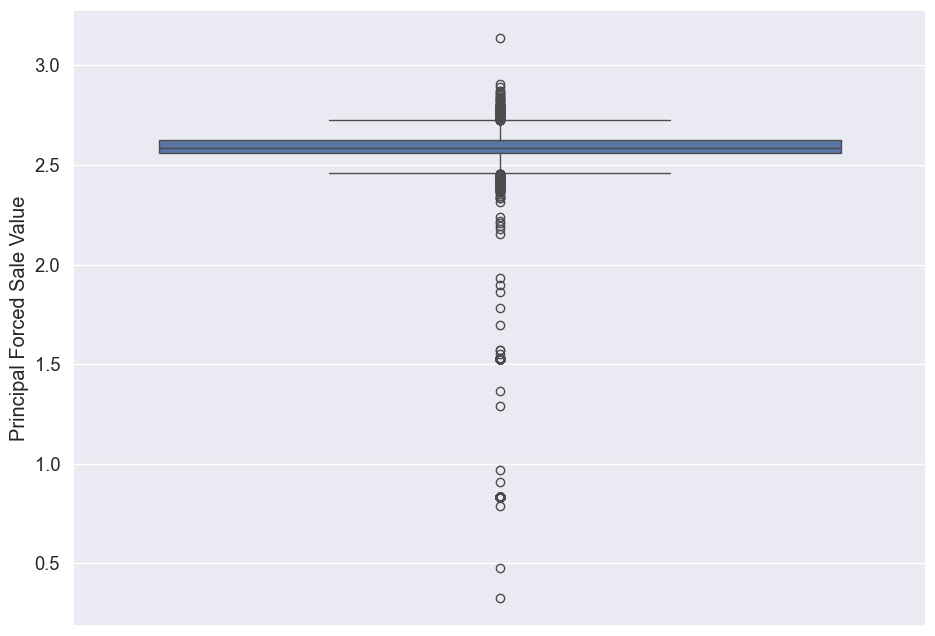

In [121]:
from scipy import stats

sns.boxplot(final_data['Principal Forced Sale Value'])


print("Skewness: %f" % final_data['Principal Forced Sale Value'].skew())
print("Kurtosis: %f" % final_data['Principal Forced Sale Value'].kurt())



<Axes: >

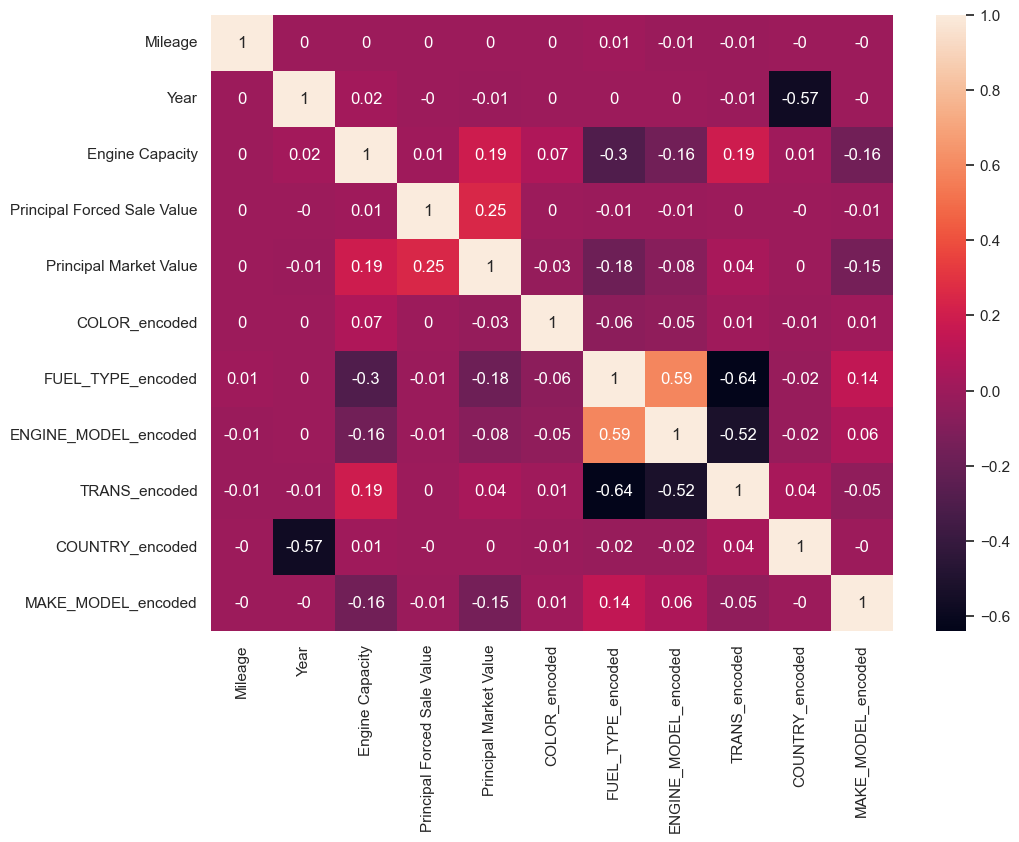

In [106]:
sns.set(rc={'figure.figsize':(11, 8)})
corr_mat = corelate_data.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

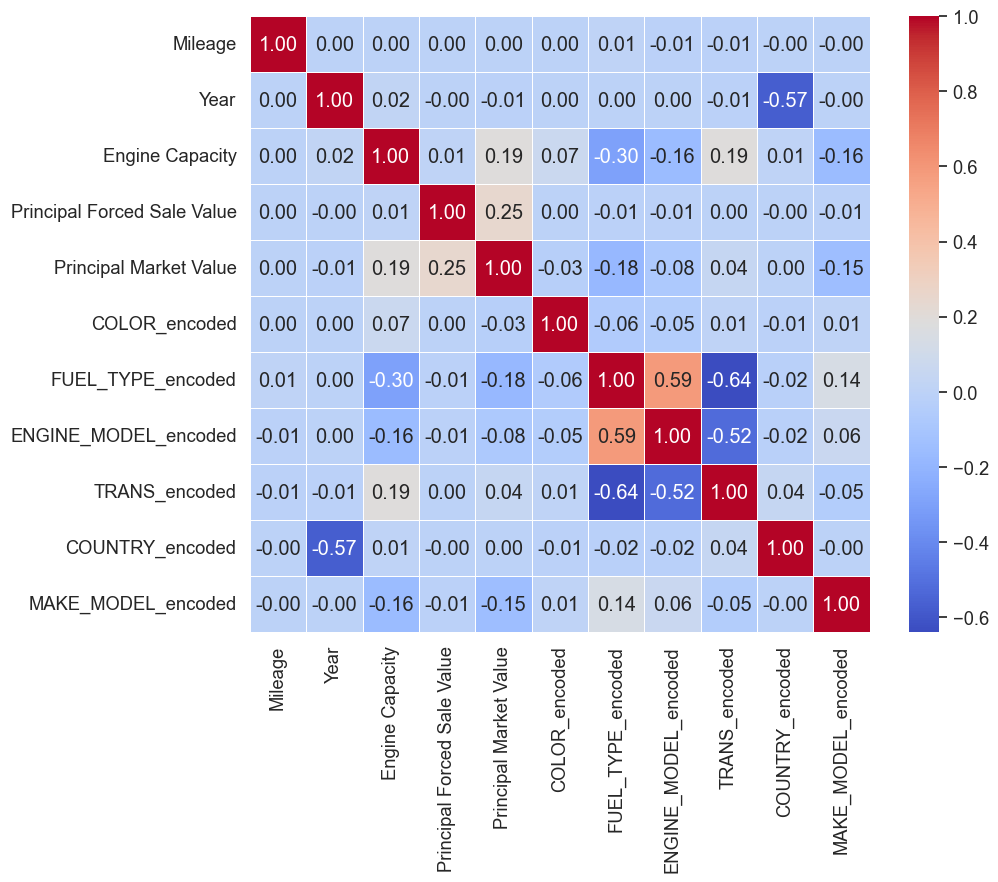

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing data

# Calculate the correlation matrix
corr_mat = corelate_data.corr().round(2)

# Display the correlation matrix as a table
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(data=corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

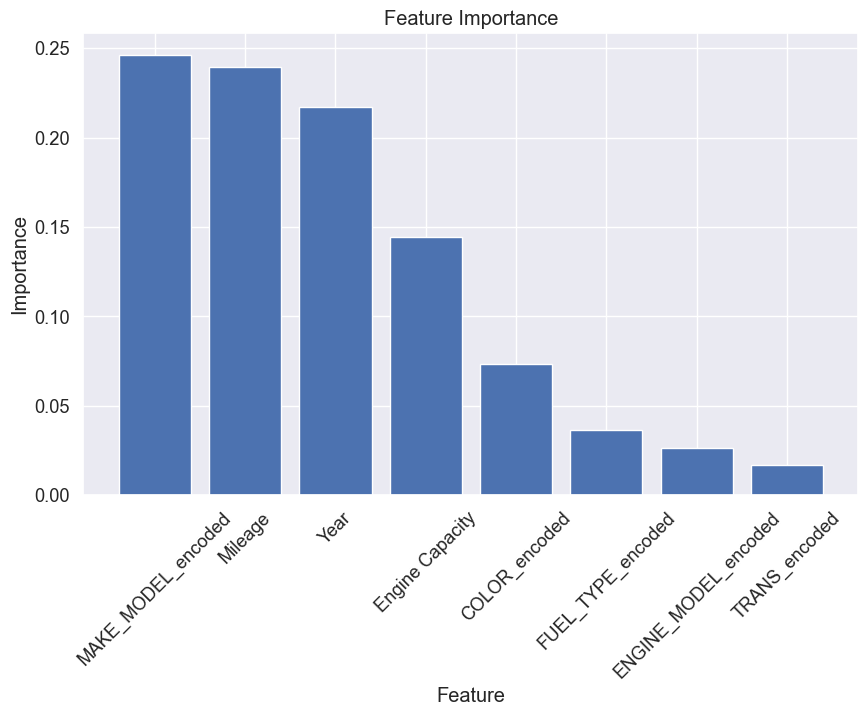

In [112]:
# Separate features and target variable
mask=corelate_data['Principal Market Value'].notnull()
corelate_data=corelate_data[mask]
X = corelate_data[['Mileage','Engine Capacity','COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','Year','TRANS_encoded','MAKE_MODEL_encoded']]
y = corelate_data['Principal Market Value']

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

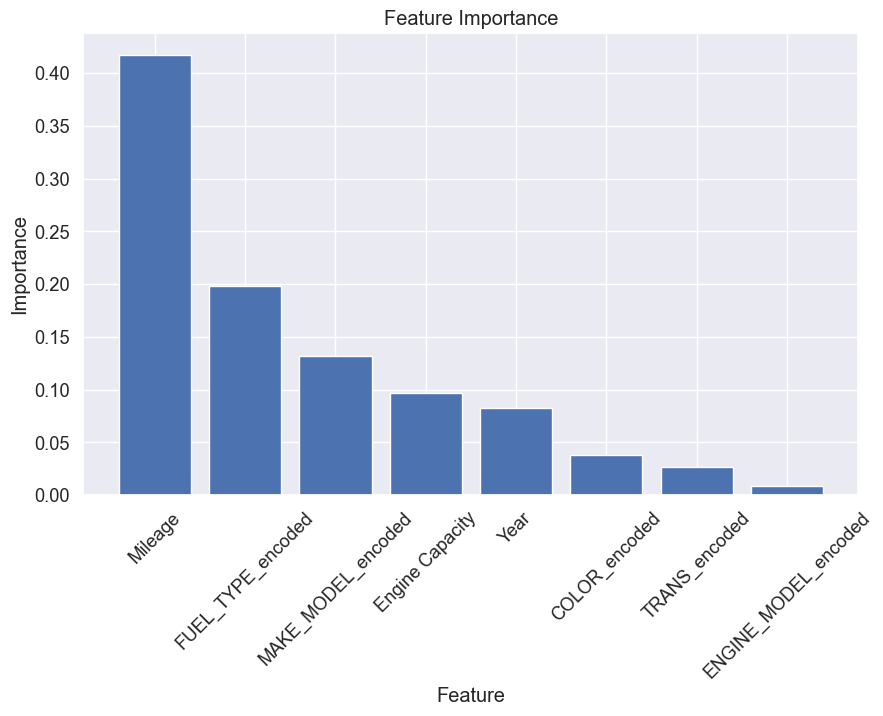

In [113]:
mask=corelate_data['Principal Forced Sale Value'].notnull()
corelate_data=corelate_data[mask]
X = corelate_data[['Mileage','Engine Capacity','COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','Year','TRANS_encoded','MAKE_MODEL_encoded']]
y = corelate_data['Principal Forced Sale Value']
# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [114]:
print(feature_importance_df)


                Feature  Importance
0               Mileage    0.417103
3     FUEL_TYPE_encoded    0.198200
7    MAKE_MODEL_encoded    0.131959
1       Engine Capacity    0.097055
5                  Year    0.082470
2         COLOR_encoded    0.038107
6         TRANS_encoded    0.026614
4  ENGINE_MODEL_encoded    0.008491


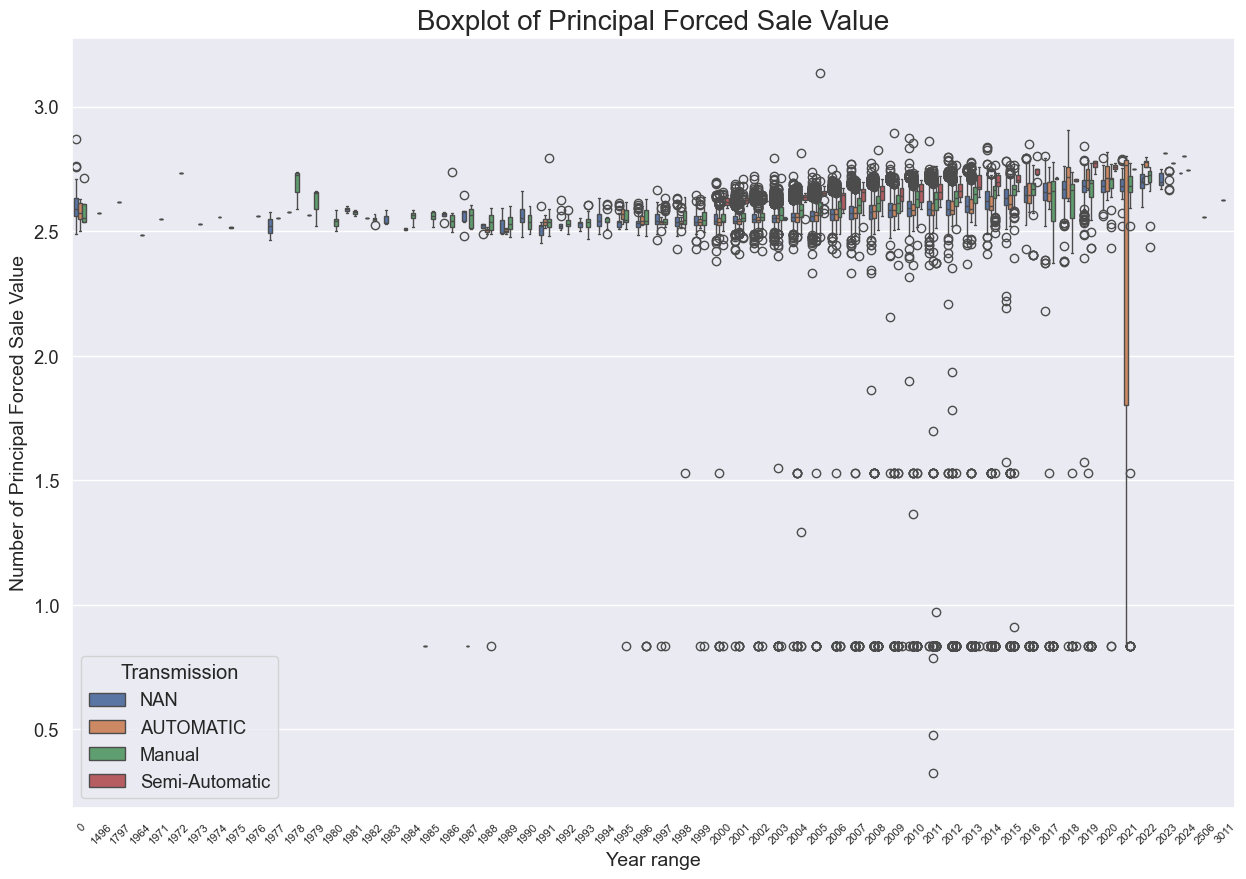

In [137]:
import plotly.express as px
from scipy import stats
mask=final_data['Principal Forced Sale Value'].notnull()
final_data=final_data[mask]

plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Principal Forced Sale Value'
sns.boxplot(data=final_data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.xticks(rotation=45)
plt.xticks(fontsize=8)

plt.show()

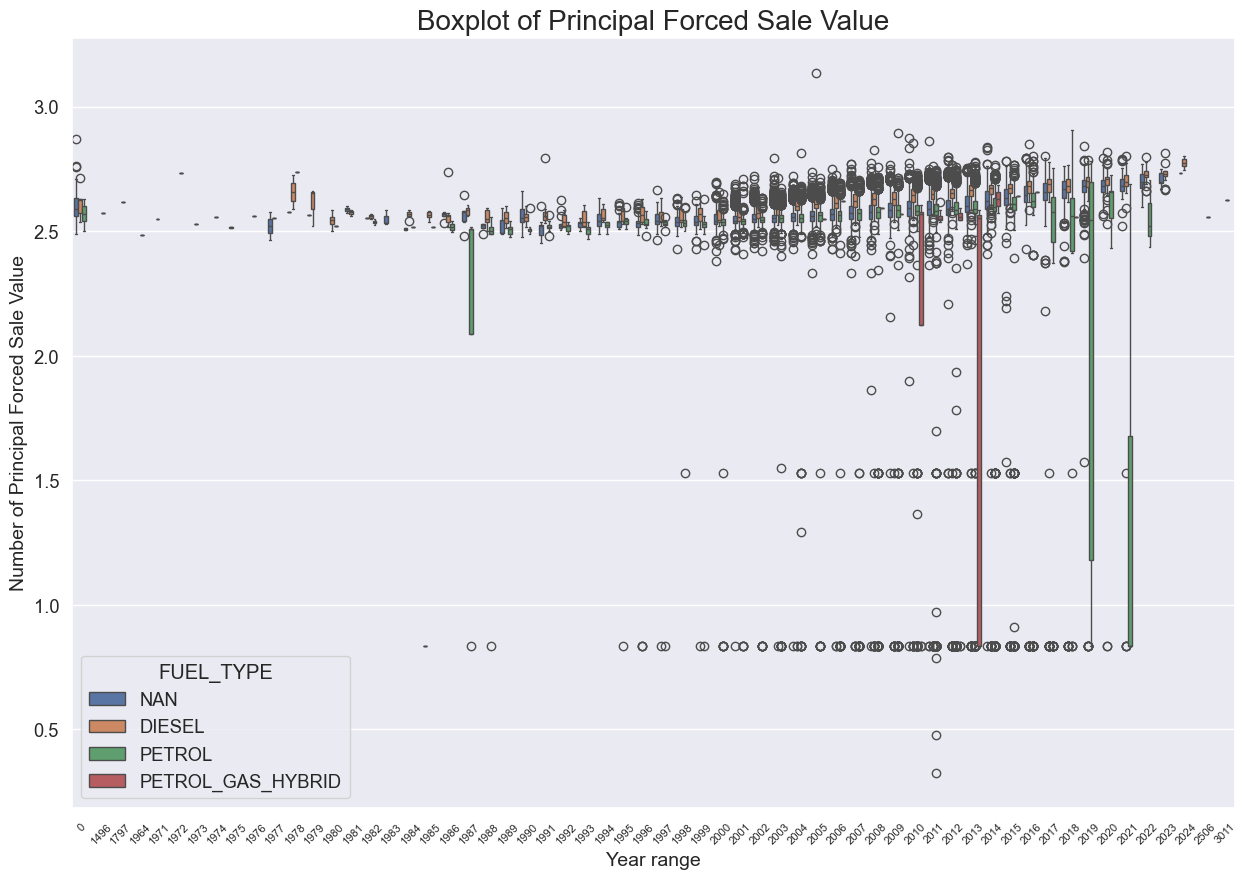

In [135]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Principal Forced Sale Value'
sns.boxplot(data=final_data, x=xprop, y=yprop, hue='FUEL_TYPE')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.show()